In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
qt = pd.read_csv('qt.csv')
annonimized = pd.read_csv('annonimized.csv')


print("Size of qt dataset:", qt.shape)
print("Size of annonimized dataset:", annonimized.shape)


Size of qt dataset: (761, 2)
Size of annonimized dataset: (295198, 11)


In [ ]:
print("=== Annonimized Dataset Analysis ===")
print(f"Columns: {annonimized.columns.tolist()}")

print(f"\nNumber of unique students: {annonimized['concat(\'it001\', username)'].nunique()}")
print(f"Number of unique assignments: {annonimized['concat(\'it001\',`assignment_id`)'].nunique()}")
print(f"Number of unique problems: {annonimized['concat(\'it001\',`problem_id`)'].nunique()}")

=== Annonimized Dataset Analysis ===
Columns: ["concat('it001',`assignment_id`)", "concat('it001',`problem_id`)", "concat('it001', username)", 'is_final', 'status', 'pre_score', 'coefficient', "concat('it001',`language_id`)", 'created_at', 'updated_at', 'judgement']

Number of unique students: 1489
Number of unique assignments: 203
Number of unique problems: 469


In [ ]:
import json

annonimized_extracted = annonimized[[
    "concat('it001',`assignment_id`)",
    "concat('it001',`problem_id`)",
    "concat('it001', username)",
    "is_final",
    "status",
    "coefficient",
    "pre_score",
    "created_at",
    "updated_at",
    "judgement"
]].copy()

annonimized_extracted.columns = [
    "assignment_id",
    "problem_id",
    "student",
    "is_final",
    "status",
    "late_coef",
    "score_percent",
    "submit_time",
    "grade_time",
    "judgement"
]

annonimized_extracted = annonimized_extracted[[
    "assignment_id",
    "problem_id",
    "student",
    "is_final",
    "status",
    "late_coef",
    "score_percent",
]]

annonimized_extracted.head()

,assignment_id,problem_id,student,is_final,status,late_coef,score_percent
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,100,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,100,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,100,10000
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,100,10000
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,100,10000


In [90]:
annonimized_extracted

,assignment_id,problem_id,student,is_final,status,late_coef,score_percent
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,100,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,100,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,100,10000
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,100,10000
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,100,10000
...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,100,10000
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,100,0
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,100,10000
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,100,10000


In [91]:
student_stats = annonimized_extracted.groupby('student').agg(
    num_submissions=('student', 'count'),
    avg_score_percent=('score_percent', 'mean'),
    avg_late_coef=('late_coef', 'mean'),
    num_assignments=('assignment_id', 'nunique'),
    num_problems=('problem_id', 'nunique'),
    num_final_submissions=('is_final', lambda x: (x == True).sum()),
    num_non_final_submissions=('is_final', lambda x: (x == False).sum()),
    num_passed=('status', lambda x: (x == 'passed').sum()),
    num_failed=('status', lambda x: (x == 'failed').sum()),
    num_late=('late_coef', lambda x: (x > 0).sum()),
    num_on_time=('late_coef', lambda x: (x == 0).sum()),

).reset_index()

student_stats['avg_score_percent'] = student_stats['avg_score_percent'].round(2)
student_stats['avg_late_coef'] = student_stats['avg_late_coef'].round(2)
student_stats['num_submissions'] = student_stats['num_submissions'].astype(int)
student_stats['num_assignments'] = student_stats['num_assignments'].astype(int)
student_stats['num_problems'] = student_stats['num_problems'].astype(int)

student_stats

,student,num_submissions,avg_score_percent,avg_late_coef,num_assignments,num_problems,num_final_submissions,num_non_final_submissions,num_passed,num_failed,num_late,num_on_time
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,5504.15,100.0,7,46,46,101,0,0,147,0
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,5488.55,100.0,9,78,78,181,0,0,259,0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,5973.75,100.0,7,66,67,128,0,0,195,0
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,5952.76,100.0,4,47,47,53,0,0,100,0
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,6474.45,97.2,8,52,66,41,0,0,104,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,74,5581.08,100.0,9,34,34,40,0,0,74,0
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,260,6204.56,100.0,6,77,78,182,0,0,260,0
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,437,4998.47,100.0,6,100,103,334,0,0,437,0
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,94,4343.33,100.0,7,34,34,60,0,0,94,0


In [92]:
qt['diemqt'] = pd.to_numeric(qt['diemqt'], errors='coerce')
qt

,hash,diemqt
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,7.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,9.0
3,013de369c439ab0ead8aa7da64423aa395a8be39,10.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,9.0
...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,9.0
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,8.0
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,6.5
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,10.0


In [ ]:
student_stats_merged = student_stats.merge(qt[['hash', 'diemqt']], how='left', left_on='student', right_on='hash')
student_stats_merged = student_stats_merged.drop(columns=['hash'])


student_stats_merged

,student,num_submissions,avg_score_percent,avg_late_coef,num_assignments,num_problems,num_final_submissions,num_non_final_submissions,num_passed,num_failed,num_late,num_on_time,diemqt
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,5504.15,100.0,7,46,46,101,0,0,147,0,7.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,5488.55,100.0,9,78,78,181,0,0,259,0,7.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,5973.75,100.0,7,66,67,128,0,0,195,0,9.0
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,5952.76,100.0,4,47,47,53,0,0,100,0,NaN
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,6474.45,97.2,8,52,66,41,0,0,104,3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,74,5581.08,100.0,9,34,34,40,0,0,74,0,NaN
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,260,6204.56,100.0,6,77,78,182,0,0,260,0,NaN
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,437,4998.47,100.0,6,100,103,334,0,0,437,0,NaN
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,94,4343.33,100.0,7,34,34,60,0,0,94,0,NaN


In [ ]:

graded = student_stats_merged[student_stats_merged['diemqt'].notnull()].copy()
ungraded = student_stats_merged[student_stats_merged['diemqt'].isnull()].copy()

In [95]:
graded

,student,num_submissions,avg_score_percent,avg_late_coef,num_assignments,num_problems,num_final_submissions,num_non_final_submissions,num_passed,num_failed,num_late,num_on_time,diemqt
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,5504.15,100.0,7,46,46,101,0,0,147,0,7.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,5488.55,100.0,9,78,78,181,0,0,259,0,7.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,5973.75,100.0,7,66,67,128,0,0,195,0,9.0
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,6474.45,97.2,8,52,66,41,0,0,104,3,10.0
5,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,5240.03,100.0,9,90,90,109,0,0,199,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,840d07858c03f80f4695056e2cc7d0c474b83a25,111,5171.64,100.0,6,43,44,67,0,0,111,0,9.0
797,844f5db2e7e31ae51eba025480679ed7e4708ac6,357,4785.22,100.0,17,104,104,253,0,0,357,0,8.0
798,845acd04a77b3d1b623f255d9f9f8eae90892dab,155,4247.30,100.0,8,52,53,102,0,0,155,0,6.5
799,8460eaaf887a6289fb156f7562fb739ba8e9629e,557,4278.61,100.0,12,114,115,442,0,0,557,0,10.0


In [96]:
ungraded

,student,num_submissions,avg_score_percent,avg_late_coef,num_assignments,num_problems,num_final_submissions,num_non_final_submissions,num_passed,num_failed,num_late,num_on_time,diemqt
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,5952.76,100.0,4,47,47,53,0,0,100,0,NaN
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,144,5035.76,100.0,4,50,50,94,0,0,144,0,NaN
40,06024da8147b5cf6105beb4c403f67cf1ff0aea1,8,6778.75,100.0,1,5,5,3,0,0,8,0,NaN
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,192,4065.37,100.0,4,50,50,142,0,0,192,0,NaN
80,0bf111a9caedf02804f6991792490e63bc21058a,199,6355.75,100.0,6,65,82,117,0,0,199,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,74,5581.08,100.0,9,34,34,40,0,0,74,0,NaN
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,260,6204.56,100.0,6,77,78,182,0,0,260,0,NaN
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,437,4998.47,100.0,6,100,103,334,0,0,437,0,NaN
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,94,4343.33,100.0,7,34,34,60,0,0,94,0,NaN


In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Model score (R^2): -0.016966225783525912


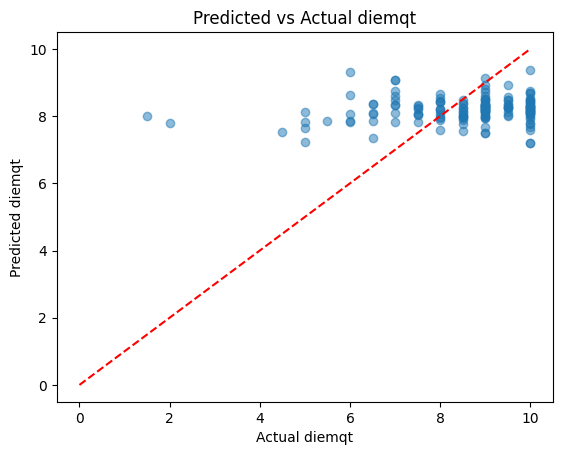

In [ ]:

X = graded.drop(columns=['student', 'diemqt'])
y = graded['diemqt'].astype(float)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Model score (R^2):", lr.score(X_test, y_test))
plt.scatter(y_test, lr.predict(X_test), alpha=0.5)
plt.xlabel('Actual diemqt')
plt.ylabel('Predicted diemqt')
plt.title('Predicted vs Actual diemqt')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') 
plt.show()


In [ ]:
X_predict = scaler.transform(ungraded.drop(columns=['student', 'diemqt']))

predictions = lr.predict(X_predict)

predict_ungraded = ungraded.copy()
predict_ungraded['diemqt'] = predictions

predict_ungraded

,student,num_submissions,avg_score_percent,avg_late_coef,num_assignments,num_problems,num_final_submissions,num_non_final_submissions,num_passed,num_failed,num_late,num_on_time,diemqt
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,5952.76,100.0,4,47,47,53,0,0,100,0,8.208611
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,144,5035.76,100.0,4,50,50,94,0,0,144,0,8.161131
40,06024da8147b5cf6105beb4c403f67cf1ff0aea1,8,6778.75,100.0,1,5,5,3,0,0,8,0,8.207558
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,192,4065.37,100.0,4,50,50,142,0,0,192,0,8.104593
80,0bf111a9caedf02804f6991792490e63bc21058a,199,6355.75,100.0,6,65,82,117,0,0,199,0,9.009490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,74,5581.08,100.0,9,34,34,40,0,0,74,0,7.816702
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,260,6204.56,100.0,6,77,78,182,0,0,260,0,8.536459
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,437,4998.47,100.0,6,100,103,334,0,0,437,0,8.805256
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,94,4343.33,100.0,7,34,34,60,0,0,94,0,7.776863


In [ ]:

predict_ungraded = predict_ungraded[['student', 'diemqt']]

predict_ungraded.to_csv('predicted_diemqt.csv', index=False)